In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from acquire import opsd_germany_daily, get_store_data
from prepare import prep_german_data, prep_store_data, hist_plot

In [2]:
# plotting defaults
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)

In [3]:
df = get_store_data()
df.head()

,sale_amount,sale_date,sale_id,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14
0,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2,14.0,"Thu, 03 Jan 2013 00:00:00 GMT",3,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
3,13.0,"Fri, 04 Jan 2013 00:00:00 GMT",4,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
4,10.0,"Sat, 05 Jan 2013 00:00:00 GMT",5,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013


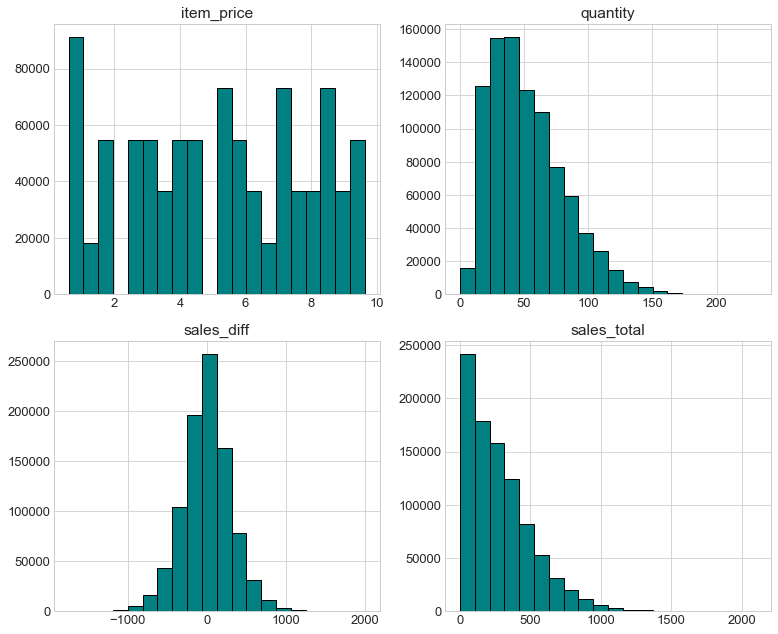

,quantity,sale_id,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,month,day_of_week,sales_total,sales_diff
sale_date,,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,13.0,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,Tuesday,10.92,NaN
2013-01-01 00:00:00+00:00,26.0,211817,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,Tuesday,218.40,207.48
2013-01-01 00:00:00+00:00,27.0,832657,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mama Marys,46,Pizza Sauce,4.65,35457770664,35457770664,1,Tuesday,125.55,-92.85
2013-01-01 00:00:00+00:00,54.0,213643,15000 San Pedro Ave,San Antonio,8,TX,78232,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,Tuesday,453.60,328.05
2013-01-01 00:00:00+00:00,35.0,215469,735 SW Military Dr,San Antonio,9,TX,78221,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,Tuesday,294.00,-159.60


In [4]:
df = prep_store_data(df)
df.head()

# 1. Split your data into train and test using the sklearn.model_selection.TimeSeriesSplit method.


In [5]:
# Resample by day
df = df.resample('D').sum()
# Using the year column as the index
df['year'] = df.index.year
df.head()

,quantity,item_price,sales_total,sales_diff,year
sale_date,,,,,
2013-01-01 00:00:00+00:00,13696.0,2580.2,73844.01,200.06,2013
2013-01-02 00:00:00+00:00,13678.0,2580.2,73570.58,41.58,2013
2013-01-03 00:00:00+00:00,14488.0,2580.2,78169.48,-185.35,2013
2013-01-04 00:00:00+00:00,15677.0,2580.2,84467.73,73.19,2013
2013-01-05 00:00:00+00:00,16237.0,2580.2,87621.85,-129.48,2013


In [7]:
df.shape

(1826, 5)

In [8]:
# Using the human based approach. Dates range from 2013 - 2016
train = df[:'2015'] # Includes everything up to 2015
test = df['2016'] 

In [9]:
print(train.shape)
print(test.shape)

(1095, 5)
(366, 5)


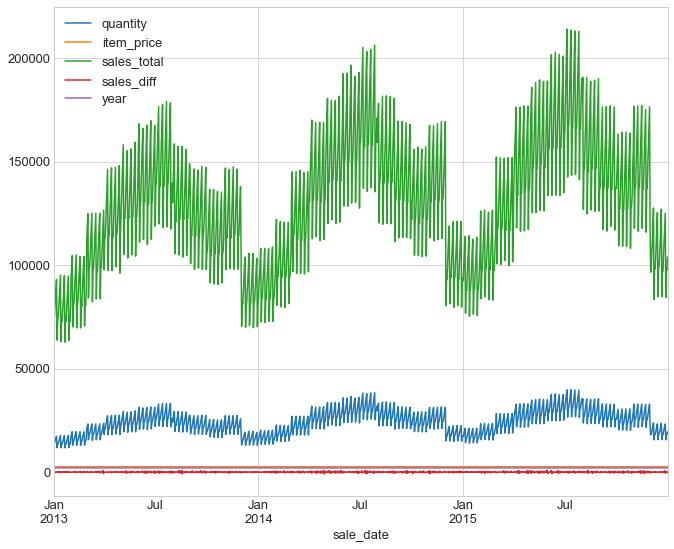

In [19]:
#Showing all the variables in train set
train.plot()

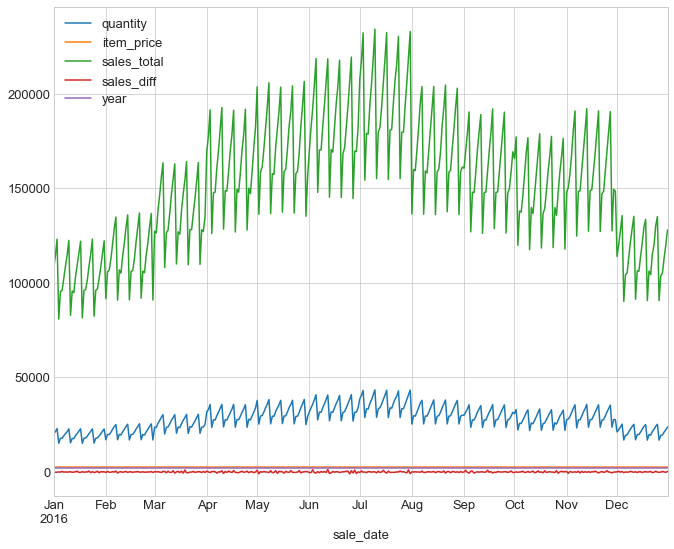

In [20]:
# Only 2016 data
test.plot()

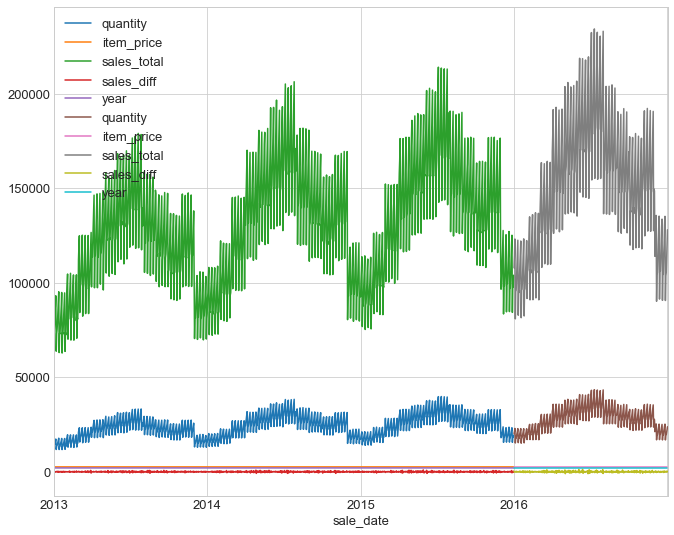

In [13]:
#Plots showing both the train and test data
ax= train.plot()
test.plot(ax=ax)

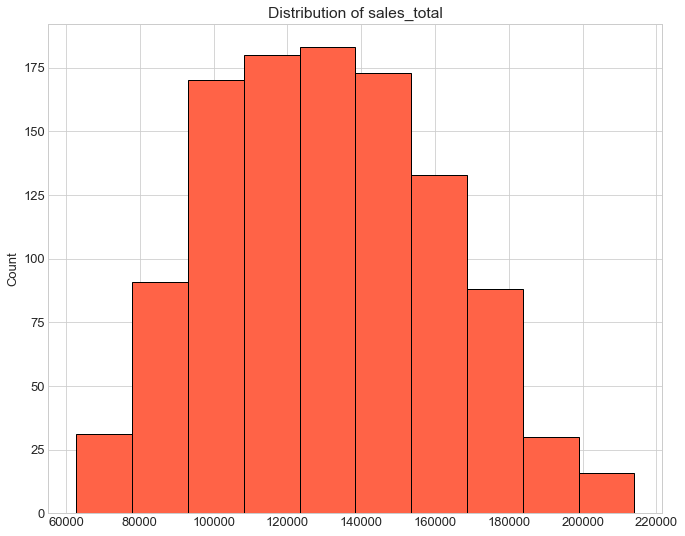

In [15]:
hist_plot(train, 'sales_total')

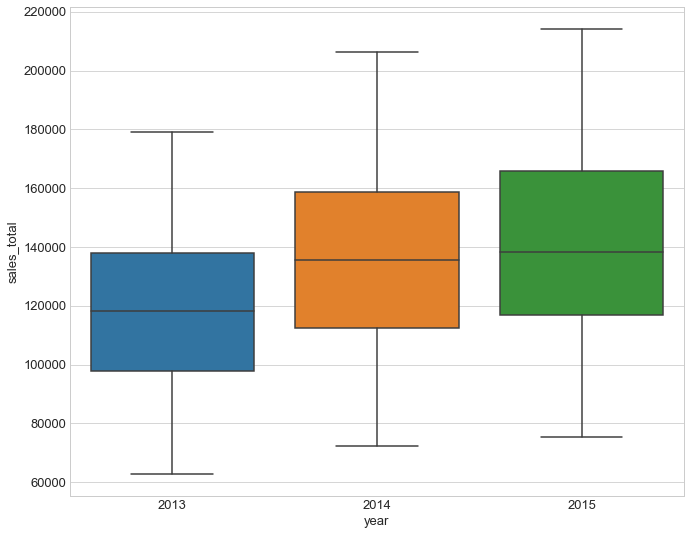

In [16]:
sns.boxplot(data=train, y='sales_total', x='year')

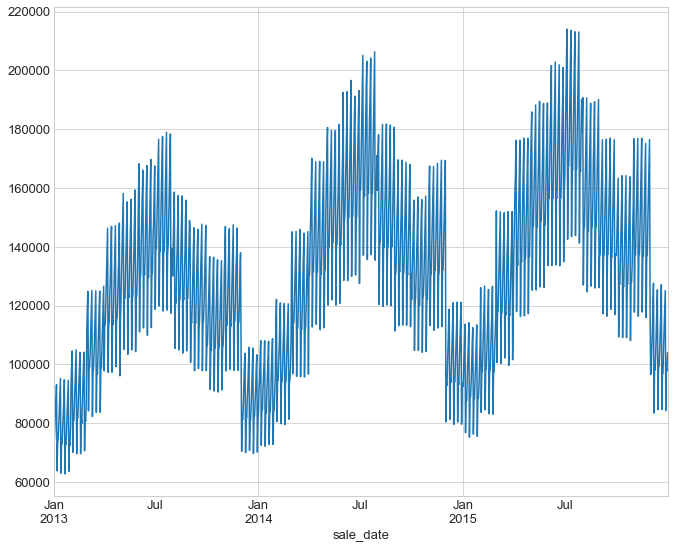

In [18]:
train.sales_total.plot()

# 3. Plot the weekly average & the 7-day moving average. Compare the 2 plots.

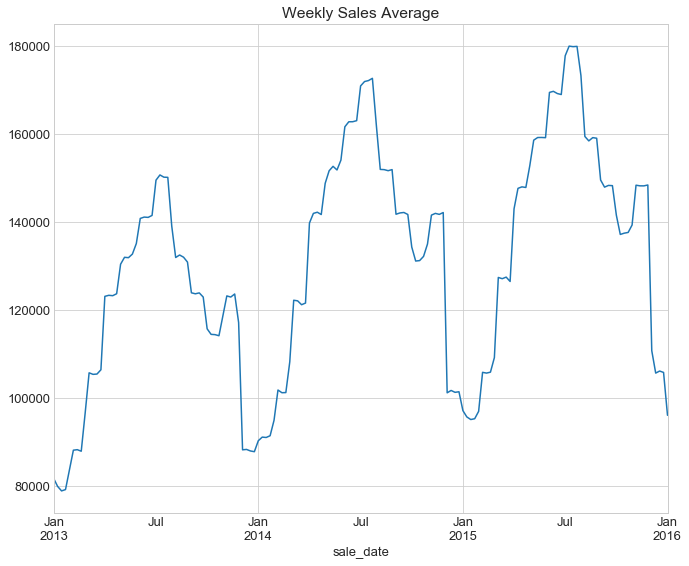

In [21]:
train.sales_total.resample('W').mean().plot(title = 'Weekly Sales Average')

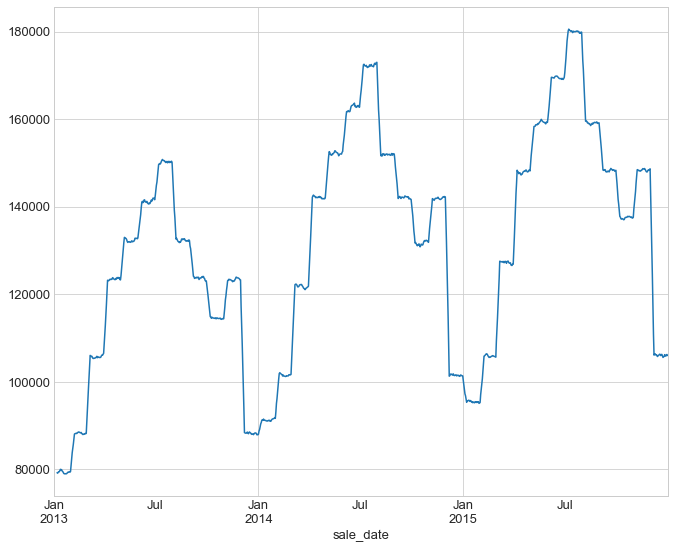

In [25]:
# 7 day moving average
train.sales_total.resample('D').mean().rolling(7).mean().plot(label='7 Day Rolling Average')

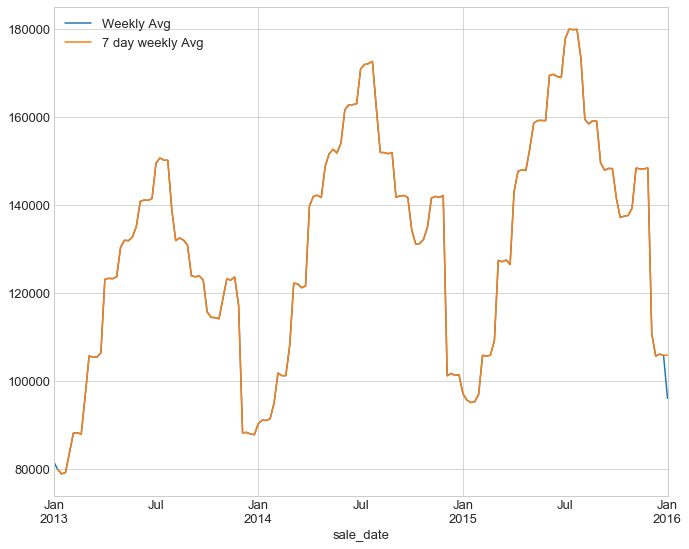

In [28]:
# Both plots on top of each other
y= train.sales_total
y.resample('W').mean().plot(label= 'Weekly Avg')
y.resample('D').mean().rolling(7).mean().plot(label='7 day weekly Avg')
plt.legend()
plt.show()


# 4. Plot the daily difference. Observe whether usage seems to vary drastically from day to day or has more of a smooth transition.

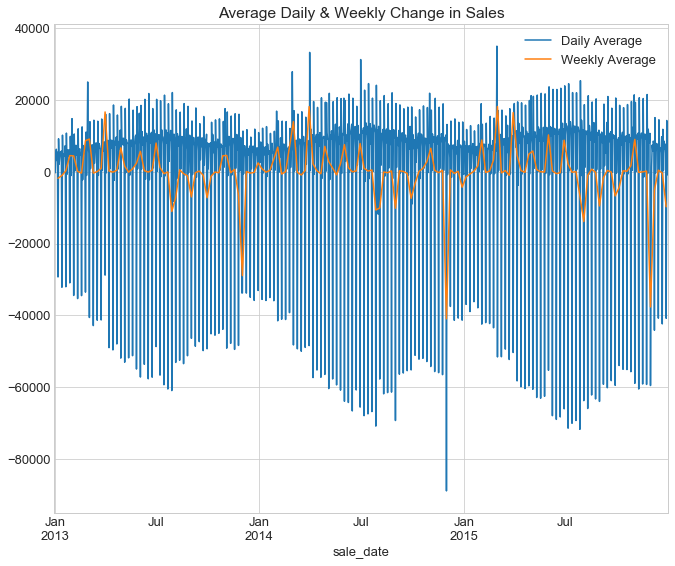

In [31]:
y.resample('D').mean().diff().plot(label='Daily Average')
y.resample('W').mean().diff().plot(label='Weekly Average')
plt.title('Average Daily & Weekly Change in Sales')
plt.legend()

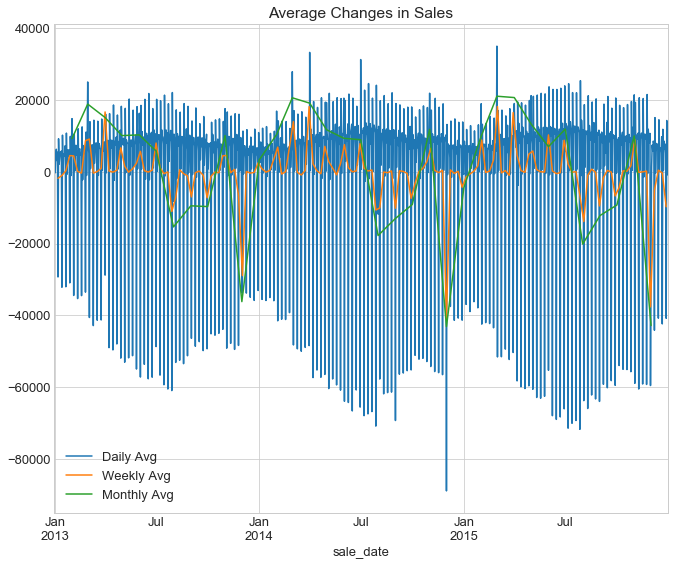

In [33]:
y.resample('D').mean().diff().plot(label='Daily Avg')
y.resample('W').mean().diff().plot(label= 'Weekly Avg')
y.resample('M').mean().diff().plot(label= 'Monthly Avg')
plt.title('Average Changes in Sales')
plt.legend()
plt.show()

# 5. Plot a time series decomposition.¶

In [34]:
# Decomposition Code DF
y = train.sales_total.resample('W').mean()

result = sm.tsa.seasonal_decompose(y)
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.head()

,y,trend,seasonal,resid
sale_date,,,,
2013-01-06 00:00:00+00:00,81794.583333,NaN,-37435.450173,NaN
2013-01-13 00:00:00+00:00,79990.601429,NaN,-38017.166821,NaN
2013-01-20 00:00:00+00:00,78973.360000,NaN,-38637.757797,NaN
2013-01-27 00:00:00+00:00,79272.691429,NaN,-38633.862371,NaN
2013-02-03 00:00:00+00:00,83792.507143,NaN,-36345.604129,NaN


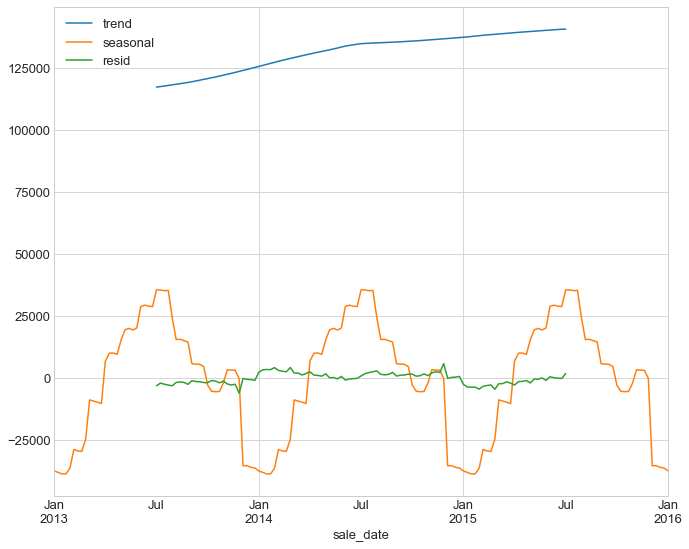

In [35]:
# iloc[:, 1:] The first : gets all the rows and  1: gets the second column index 1 and
# all the other columns
decomposition.iloc[:, 1:].plot()

# Exercise
### Do your work for this exercise in a notebook named explore. Use the techniques in the lesson to explore the store item demand dataset and the opsd dataset.

### For the store item demand data, you will need to choose a method of aggregating such that each observation is a unique date. For both datasets you should choose a method of splitting your data and only explore the training split.

In [ ]:
df = opsd_germany_daily()
df.head()

In [ ]:
df = prep_german_data(df)

In [ ]:
df.head()

In [ ]:
# Splitting the data using the percent cutoff method
train_size = .70
n = df.shape[0]
test_start_index = round(train_size * n)

train = df[:test_start_index] # everything up (not including) to the test_start_index
test = df[test_start_index:] # everything from the test_start_index to the end

plt.plot(train.index, train.consumption)
plt.plot(test.index, test.consumption)

## 2. Validate your splits by plotting X_train and y_train

In [ ]:
y_train = train.consumption
y_train.plot.hist()
plt.show() # gets rid of the wording above the graph

In [ ]:
sns.barplot(data = train, y='consumption', x = 'year')
plt.show()

In [ ]:
train['month'] = train.index.month

train.groupby('month').consumption.mean().plot.bar()

In [ ]:
sns.boxplot(data = train, y='consumption', x = 'year')
plt.show()

## 3. Plot the weekly average & the 7-day moving average. Compare the 2 plots.

In [ ]:
y_train.resample('W').mean().plot(label= 'Weekly Avg')
plt.legend()
plt.show()

In [ ]:
y_train.rolling(7).mean().plot(label = '7 Day Rolling Avg')
plt.legend()
plt.show()

In [ ]:
y_train.resample('W').mean().plot(label= 'Weekly Avg')
y_train.rolling(7).mean().plot(label = '7 Day Rolling Avg')
plt.legend()
plt.show()

# 4. Group the electricity consumption time series by month of year, to explore annual seasonality.

In [ ]:
# Seasonal Plot
y_train.groupby([y_train.index.year, y_train.index.month]).mean().unstack(0).plot(title='Seasonal Plot')
plt.show()

# 5. Plot the daily difference. Observe whether usage seems to vary drastically from day to day or has more of a smooth transition.

In [ ]:
y_train.resample('D').mean().diff().plot(label='Daily Avg')
y_train.resample('W').mean().diff().plot(label= 'Weekly Avg')
plt.title('Average Daily Change in Consumption')
plt.legend()
plt.show()